# The quantum-deutsch Notebook by Walter Regan

***
### An explanation of Deutsch’s Algorithm and code simulating it using qiskit

[Deutsch-Jozsa Algorithm](https://qiskit.org/textbook/ch-algorithms/deutsch-jozsa.html)

In [1]:
# qiskit - represents quantum things
import qiskit

In [2]:
# aer simulator, acts like different quantum computers
import qiskit.providers.aer as aer

In [3]:
# for diagrams
import matplotlib.pyplot as plt

In [4]:
# change pyplot style
plt.style.use('ggplot')

In [5]:
# random numbers
import random

<br />

## Preliminaries
***

#### Qubits displayed using ket notation
$|0 \rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$

$|1 \rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$

$|\psi \rangle = \begin{bmatrix} \alpha \\ \beta \end{bmatrix} = \alpha |0 \rangle + \beta|1 \rangle$
alpha and beta are complex numbers

$\alpha = a + bi \qquad \beta = c + di \qquad a,b,c,d \in \mathbb{R}$

$\alpha^2 + \beta^2 = 1$

### Gates in Quantum World

__Hadamard Gate__

$H = \begin{bmatrix} \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$

$H | 0 \rangle = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix} 1 & 0  \end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix} = \begin{bmatrix}  \frac{1} {\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{bmatrix} = |+\rangle$


$H | 1 \rangle = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix} 0 & 1  \end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ -1 \end{bmatrix} = \begin{bmatrix}  \frac{1} {\sqrt{2}} \\ -\frac{1}{\sqrt{2}} \end{bmatrix} = |-\rangle$

The above matrix multiplications that result in 2 valid Qubit states

$H^* = H^{-1}$

What makes a matrix a valid qubit gate is the condition where H* is the inverse of H. H* means the conjugate transpose. By transposing the matrix H the rows are turned into columns.

$(a+bi)^* = a - bi$

Where you have a complex number as a+bi, to conjugate it, turn the + into a -, or - into a +.

$I = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$

Above is the indenity matrix where by multiplying it by another matrix it gives the same matrix back.

## Measurement

__For measurement, manipulate the ket into a bra by turning it into a row vector. Take the complex conjugate of the entries if they are complex. Then do matrix multiplication.__

$|\psi\rangle = \begin{bmatrix} \alpha \\ \beta \end{bmatrix} \Leftrightarrow \langle \psi | = \begin{bmatrix} \alpha^* & \beta^* \end{bmatrix}$

__Probability of measuring $|0\rangle$ when in $|+\rangle$__

In the below form it says, take the bra of zero, which is 1, 0 for alpha and beta above, and put it in a row vector. There is no conjugate because there are no imaginary parts.

$|\langle 0 | + \rangle |^2 = |\langle 0 || + \rangle |^2 = | \begin{bmatrix} 1 & 0 \end{bmatrix} \begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \end{bmatrix} |^2 = |(1)(\frac{1}{\sqrt{2}}) + (0)(\frac{1}{\sqrt{2}})|^2 = (\frac{1}{\sqrt{2}})^2 = \frac{1}{2}$

In above zero is bra format, + in ket format. Form the bra-ket and take its magnitude and square it.

$|a+bi| = \sqrt{(a+bi)(a-bi)} = \sqrt{a^2 + b^2}$

Above is the magnitude of |a+bi|.

__Probability of measuring $|1\rangle$ when in $|-\rangle$__

$|\langle 1 | - \rangle |^2 = |\langle 1 || - \rangle |^2 = | \begin{bmatrix} 0 & 1 \end{bmatrix} \begin{bmatrix} \frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}} \end{bmatrix} |^2 = |(0)(\frac{1}{\sqrt{2}}) + (0)(-\frac{1}{\sqrt{2}})|^2 = (-\frac{1}{\sqrt{2}})^2 = \frac{1}{2}$


__Probability of measuring $|1\rangle$ when in $|0\rangle$__

$|\langle 1 | 0 \rangle |^2 == \begin{bmatrix} 0 & 1 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} |^2 = |(0)(1) + (1)(0)|^2 = 0$

<br />

## Multiple Qubits

First qubit: $|0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$

Second qubit: $|1\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$

Below shows how to represent both together

Together: $|01\rangle = |0\rangle \bigotimes |1\rangle \begin{bmatrix} 1 \begin{bmatrix} 0 \\ 1 \end{bmatrix} \\ 0 \begin{bmatrix} 0 \\ 1 \end{bmatrix} \end{bmatrix} = \begin{bmatrix} (1)(0) \\ (1)(1) \\ (0)(1) \\ (0)(0) \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix}$

### $CNOT$ Gate

The CNOT gate is the main way 2 qubits interact with each other.

$CNOT = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{bmatrix}$

$CNOT \times |01\rangle = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix} = |01\rangle$

$CNOT \times |10\rangle = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{bmatrix} \begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix} = |11\rangle$

### H followed by $CNOT$

__Kronecker Product__

$H \bigotimes H = \begin{bmatrix} \frac{1}{\sqrt{2}} \begin{bmatrix} \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \end{bmatrix} & \frac{1}{\sqrt{2}} \begin{bmatrix} \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \end{bmatrix} \\ \frac{1}{\sqrt{2}} \begin{bmatrix} \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \end{bmatrix} & -\frac{1}{\sqrt{2}} \begin{bmatrix} \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{2}} \end{bmatrix} \end{bmatrix}$


$CNOT \times (H \bigotimes H) \times |10\rangle = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{bmatrix} \frac{1}{2} \begin{bmatrix} 1 & 1 & 1 & 1 \\ 1 & -1 & 1 & -1 \\ 1 & 1 & -1 & -1 \\ 1 & -1 & -1 & 1 \end{bmatrix} \begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \end{bmatrix} = \begin{bmatrix} \frac{1}{2} \\ \frac{1}{2} \\ -\frac{1}{2} \\ -\frac{1}{2} \end{bmatrix}$

$(\frac{1}{2})^2 + (\frac{1}{2})^2 + (-\frac{1}{2})^2 + (-\frac{1}{2})^2 = \frac{1}{4} + \frac{1}{4} + \frac{1}{4} + \frac{1}{4} = 1$

<br />

## Deutsch's Algorithm Theory

### Function Oracles

$|01\rangle = \begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix} \begin{matrix} |00\rangle \\ |01\rangle \\ |10\rangle \\ |11\rangle \end{matrix}$

#### Balanced: $f(0) = 0$ and $f(1) = 1$ (maps input to output)

Below is what Deutsch's algorithm requires the function to be in the format of.

$|x,y\rangle \rightarrow |x, y\oplus f(x) \rangle$

$\begin{matrix} |00\rangle \\ |01\rangle \\ |10\rangle \\ |11\rangle \end{matrix} \rightarrow \begin{matrix} |00\rangle \\ |01\rangle \\ |11\rangle \\ |10\rangle \end{matrix}$


#### Balanced: $f(0) = 1$ and $f(1) = 0$

Below is what Deutsch's algorithm requires the function to be in the format of.

$|x,y\rangle \rightarrow |x, y\oplus f(x) \rangle$

$\begin{matrix} |00\rangle \\ |01\rangle \\ |10\rangle \\ |11\rangle \end{matrix} \rightarrow \begin{matrix} |01\rangle \\ |00\rangle \\ |10\rangle \\ |11\rangle \end{matrix}$

#### Constant: $f(0) = 1$ and $f(1) = 1$

$|01\rangle = \begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix} \begin{matrix} |00\rangle \\ |01\rangle \\ |10\rangle \\ |11\rangle \end{matrix}$

Below is what Deutsch's algorithm requires the function to be in the format of.

$|x,y\rangle \rightarrow |x, y\oplus f(x) \rangle$

$\begin{matrix} |00\rangle \\ |01\rangle \\ |10\rangle \\ |11\rangle \end{matrix} \rightarrow \begin{matrix} |01\rangle \\ |00\rangle \\ |11\rangle \\ |10\rangle \end{matrix}$


#### Constant: $f(0) = 0$ and $f(1) = 0$

$|01\rangle = \begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix} \begin{matrix} |00\rangle \\ |01\rangle \\ |10\rangle \\ |11\rangle \end{matrix}$

Below is what Deutsch's algorithm requires the function to be in the format of.

$|x,y\rangle \rightarrow |x, y\oplus f(x) \rangle$

$\begin{matrix} |00\rangle \\ |01\rangle \\ |10\rangle \\ |11\rangle \end{matrix} \rightarrow \begin{matrix} |00\rangle \\ |01\rangle \\ |10\rangle \\ |11\rangle \end{matrix}$

<br />

## Constant zero function
***

In [6]:
# create a quantum circuit - if there is 1 qubit, they need 2 qubits, a single extra qubit etc.
circuit = qiskit.QuantumCircuit(2, 1)

In [7]:
# initialise the first qubit to |0>
circuit.initialize([1, 0], 0)

In [8]:
# initialise the second qubit to |1>
circuit.initialize([0, 1], 1)

In [9]:
# apply a Hadamard gate to first qubit
circuit.h(0)

In [10]:
# apply a Hadamard gate to second qubit
circuit.h(1)

In [11]:
# identity gate (matrix)
circuit.i(1)

In [12]:
# apply another Hadamard gate to the first qubit
circuit.h(0)

In [13]:
# measure the first qubit
circuit.measure(0, 0)

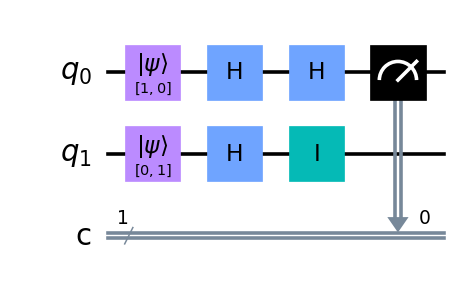

In [14]:
# draw the circuit
circuit.draw(output='mpl', scale=1.8)

In [15]:
# create a simulation instance
simulator = aer.QasmSimulator()

In [16]:
# compile the circuit in the simluator
compcircuit = qiskit.transpile(circuit, simulator)

In [17]:
# simulate the circuit 1000 times
job = simulator.run(compcircuit, shots=1000)

In [18]:
# get the results
results = job.result()

In [19]:
# show the results counts
counts = results.get_counts()
counts

{'0': 1000}

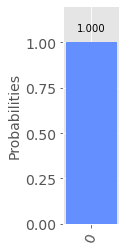

In [20]:
# display a histogram
qiskit.visualization.plot_histogram(counts, figsize=(1, 4))

<br />

## Constant one function
***

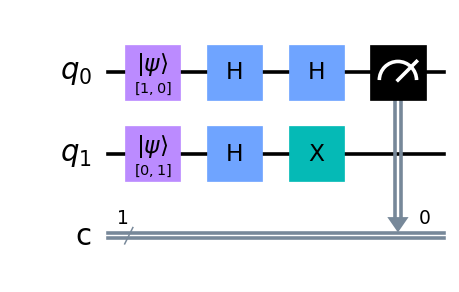

In [21]:
# create quantum circuit
circuit = qiskit.QuantumCircuit(2, 1)

# initialise first qubit to |0>
circuit.initialize([1, 0], 0)

# initialise second qubit to |1>
circuit.initialize([0, 1], 1)

# apply a Hadamard gate to each qubit
circuit.h((0, 1))

# x gate to invert the y value
circuit.x(1)

# apply another Hadamard gate to the first qubit
circuit.h(0)

# measure first qubit
circuit.measure(0, 0)

# draw circuit.
circuit.draw(output='mpl', scale=1.8)

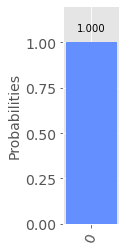

In [22]:
# create a simulation instance
simulator = aer.QasmSimulator()

# compile the circuit in the simluator
compcircuit = qiskit.transpile(circuit, simulator)

# simulate the circuit 1000 times
job = simulator.run(compcircuit, shots=1000)

# get the results
results = job.result()

# show the result counts
counts = results.get_counts()

# display histogram
qiskit.visualization.plot_histogram(counts, figsize=(1, 4))

## Balanced: $f(0) = 0, f(1) = 1$

This is actually the same as the Identity function

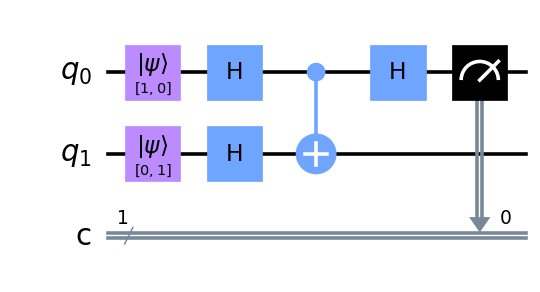

In [23]:
# create quantum circuit
circuit = qiskit.QuantumCircuit(2, 1)

# initialise first qubit to |0>
circuit.initialize([1, 0], 0)

# initialise second qubit to |1>
circuit.initialize([0, 1], 1)

# apply a Hadamard gate to each qubit
circuit.h((0, 1))

# CNOT gate
circuit.cnot(0, 1)

# apply another Hadamard gate to the first qubit
circuit.h(0)

# measure first qubit
circuit.measure(0, 0)

# draw circuit
circuit.draw(output='mpl', scale=1.8)

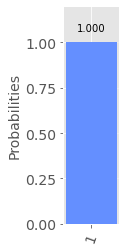

In [24]:
# create a simulation instance
simulator = aer.QasmSimulator()

# compile the circuit in the simluator
compcircuit = qiskit.transpile(circuit, simulator)

# simulate the circuit 1000 times
job = simulator.run(compcircuit, shots=1000)

# get the results
results = job.result()

# show the result counts
counts = results.get_counts()

# display histogram
qiskit.visualization.plot_histogram(counts, figsize=(1, 4))

As in the above circuit, when you measure the qubit when you have a balanced function, it always comes out as 1.

A cnot gate needs at least 2 qubits for input.

## Balanced: $f(0) = 1, f(1) = 0$

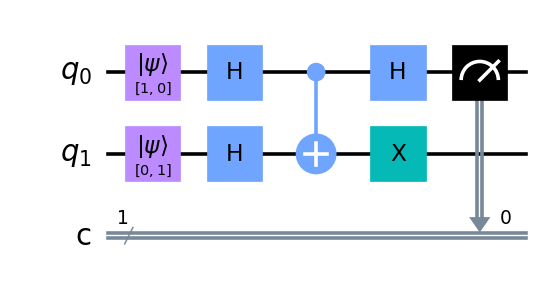

In [25]:
# create quantum circuit
circuit = qiskit.QuantumCircuit(2, 1)

# initialise first qubit to |0>
circuit.initialize([1, 0], 0)

# initialise second qubit to |1>
circuit.initialize([0, 1], 1)

# apply a Hadamard gate to each qubit
circuit.h((0, 1))

# CNOT gate
circuit.cnot(0, 1)

# apply x to second qubit
circuit.x(1)

# apply another Hadamard gate to the first qubit
circuit.h(0)

# measure first qubit
circuit.measure(0, 0)

# draw circuit
circuit.draw(output='mpl', scale=1.8)

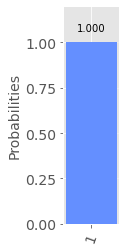

In [26]:
# create a simulation instance
simulator = aer.QasmSimulator()

# compile the circuit in the simluator
compcircuit = qiskit.transpile(circuit, simulator)

# simulate the circuit 1000 times
job = simulator.run(compcircuit, shots=1000)

# get the results
results = job.result()

# show the result counts
counts = results.get_counts()

# display histogram
qiskit.visualization.plot_histogram(counts, figsize=(1, 4))

In the above, for both Balanced functions qubit will always measure as a 1 and for both Constant function qubit will measure as a 0. Point here is, the circuit only ever uses the function f once. The function must be coded as a quantum circuit which is what gives it it's power and this is what is used to demonstrate that quantum computers are much faster than classical algorithms.

In the classical sense there would be a need to call the function twice in order to figure out whether the function was Constant or not. For instance, if you call function with input f(0) and it outputs 0, you still don't know whether it is constant or balanced. It could be the constant zero function or the balanced identity function. So you would need to call it again with f(1) and if 0 is the output then the function is a constant function, if the output is 1 you have a balanced function.

<br />

## Deutsch's Algorithm with Random Quantum Functions

Selecting a function at random to run Deutsch's algorithm.
***

In [103]:
# return a random (part of) circuit - implementing the quantum oracle for f
def random_f():
    # create own circuit with 2 qubits and 1 classical bit for measuring
    circuit = qiskit.QuantumCircuit(2, 1)
    # pick one of the four functions at random
    f_number = random.randint(1, 4)
    
    # 1: Constant 0 function - f(0) = f(1) = 0
    # 1: Constant 1 function - f(0) = f(1) = 1
    # 1: Balanced identity function - f(0) = 0,  f(1) = 1
    # 1: Balanced not function - f(0) = 1, f(1) = 0
    
    if f_number == 1:
        # apply identity gate to second qubit
        circuit.i(1)
    elif f_number == 2:
        # apply Pauli x gate to second qubit
        circuit.x(1)
    elif f_number == 3:
        # apply CNOT gate from first to second qubit
        circuit.cnot(0, 1)
    elif f_number == 4:
        # apply CNOT gate from first to second qubit
        circuit.cnot(0, 1)
        # apply Pauli x gate to second qubit
        circuit.x(1)        
    else:
        print("Error")
        
    # return circuit
    return circuit

<br />

### Create first part of Circuit

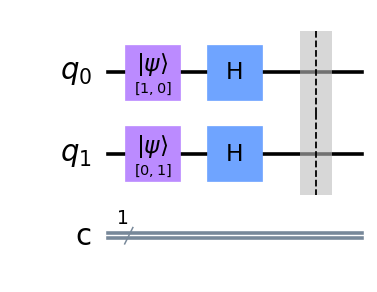

In [28]:
# create quantum circuit
circuit = qiskit.QuantumCircuit(2, 1)

# initialise first qubit to |0>
circuit.initialize([1, 0], 0)

# initialise second qubit to |1>
circuit.initialize([0, 1], 1)

# apply a Hadamard gate to each qubit
circuit.h((0, 1))

# separate different parts of the circuit
circuit.barrier()

# draw circuit
circuit.draw(output='mpl', scale=1.8)

### Create second part of Circuit

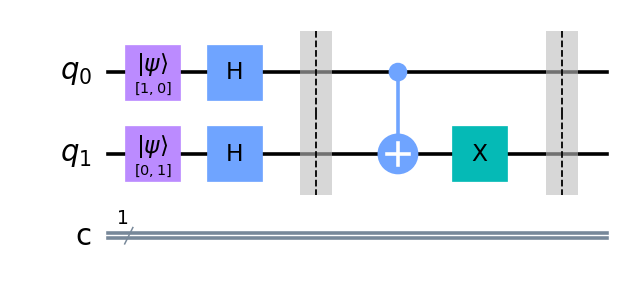

In [29]:
# append random_f() identity circuit to circuit
circuit.compose(random_f(), inplace=True) 

# separate different parts of the circuit
circuit.barrier()

# draw circuit - only ever run once and is the part we don't know in the algorithm but shown here for demonstation purposes
circuit.draw(output='mpl', scale=1.8)

### Create third part of Circuit

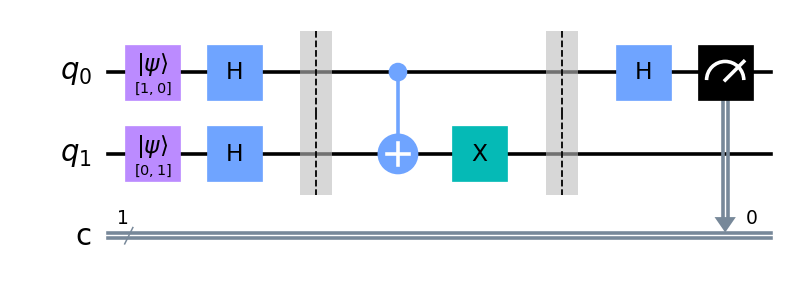

In [30]:
# apply another Hadamard gate to the first qubit
circuit.h(0)

# measure first qubit
circuit.measure(0, 0)

# draw circuit - this last part always happens
circuit.draw(output='mpl', scale=1.8)

### Simulate and Decide

Should see that results are going to be zero half the time and one half the time in general.

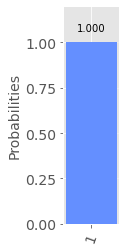

In [31]:
# create a simulation instance
simulator = aer.QasmSimulator()

# compile the circuit in the simluator
compcircuit = qiskit.transpile(circuit, simulator)

# simulate the circuit 1000 times
job = simulator.run(compcircuit, shots=1000)

# get the results
results = job.result()

# show the result counts
counts = results.get_counts()

# display histogram
qiskit.visualization.plot_histogram(counts, figsize=(1, 4))

## End of Deutsch's Algorithm with Random Quantum Functions

<br />

## Complex Numbers

***

$$a + bi \qquad a, b \in \mathbb{R} \qquad i^2 = -1 \qquad \mathrm{e.g} -2.0 + 5.0i$$

## Setup
***

In [32]:
# plotting
import matplotlib.pyplot as plt

# numerical arrays
import numpy as np

In [33]:
# plot size
plt.rcParams['figure.figsize'] = (20, 10)

# plot style
plt.style.use('seaborn-whitegrid')

<br />

## Built-in in Python
***

In [34]:
# multiply two complex numbers
1.0j * 1.0j

(-1+0j)

In [35]:
# assign complex number to x
x = -2.0 + 5.0j
x

(-2+5j)

In [36]:
# raise to power of 2
x**2

(-21-20j)

In [37]:
# assign complex number to y
y = 3.0 + 1.5j
y

(3+1.5j)

In [38]:
# add x and y
x + y

(1+6.5j)

In [39]:
# multiply x and y
x * y

(-13.5+12j)

<br />

## As pairs
***

In [40]:
# array x of real/floating point numbers
x = [-2.0, 5.0]
x

[-2.0, 5.0]

In [41]:
# array y of real/floating point numbers
y = [3.0, 1.5]
y

[3.0, 1.5]

In [42]:
# add method, returns sum of first elements in u and v, and sum of second elements in u and v
def add(u, v):
    return [u[0] + v[0], + u[1] + v[1]]

In [43]:
add(x, y)

[1.0, 6.5]

In [44]:
# multiplication method
def mult(u, v):
    a, b = u
    c, d = v
    return [(a * c) - (b * d), (b * c) + (a * d)]

In [45]:
mult(x, y)

[-13.5, 12.0]

<br />

## Origins
***

$$a x^2 + bx + c \qquad \textrm{e.g.} \ x^2 - 5x + 6 \qquad \textrm{e.g.} \ 2x^2 + 5x + 10 \qquad x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$$

In [46]:
# function that returns a function
class quadratic:
    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c
        
    def __call__(self, x):
        return self.a * x**2 + self.b * x + self.c

In [47]:
# create instance of quadratic
p = quadratic(a=1.0, b=-5.0, c=6.0)
p

In [48]:
# call p with value of 1.0
p(1.0)

2.0

In [49]:
# create an array of 1000 evenly spaced values between 0 and 5
x = np.linspace(0.0, 5.0, 1000)

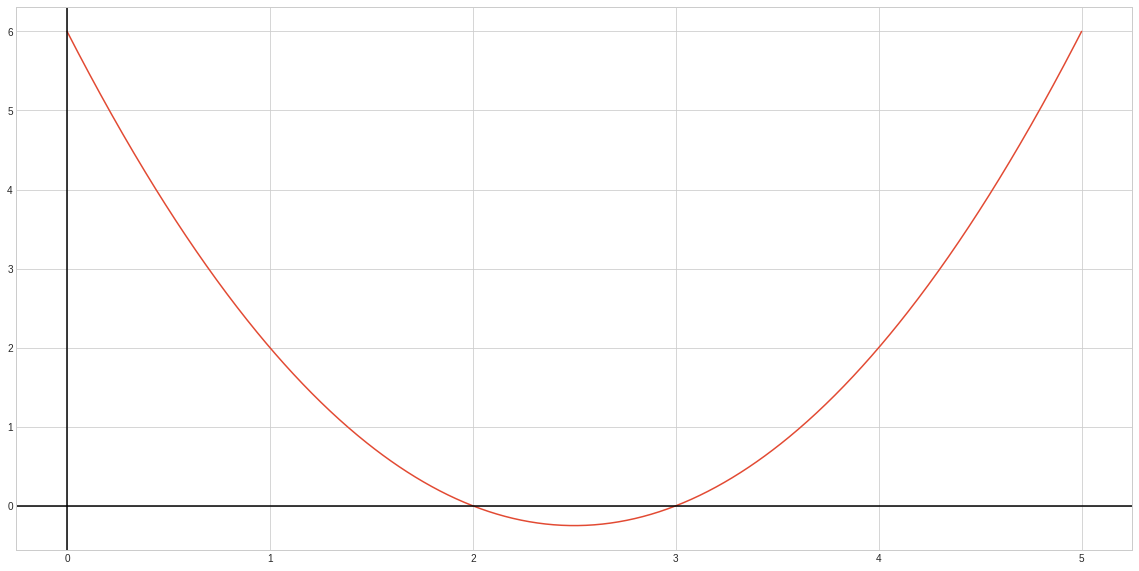

In [50]:
# plot p(x)
fig, ax = plt.subplots()
ax.plot(x, p(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

In [51]:
# solve with the formula
def solve(p):
    a, b, c = p.a, p.b, p.c
    x1 = (-b - (b**2 - 4 * a * c)**0.5) / (2 * a)
    x2 = (-b + (b**2 - 4 * a * c)**0.5) / (2 * a)
    return [x1, x2]

In [52]:
solve(p)

[2.0, 3.0]

<br />

## Not hitting x
***

$$ax^2 + bx + c = (1.0)x^2 +(0.0)x + (1.0) = x^2 + 1$$

In [53]:
# create instance of quadratic
p = quadratic(a=1.0, b=0.0, c=1.0)

In [54]:
# create an array of 1000 evenly spaced values between -2.0 and 2.0
x = np.linspace(-2.0, 2.0, 1000)

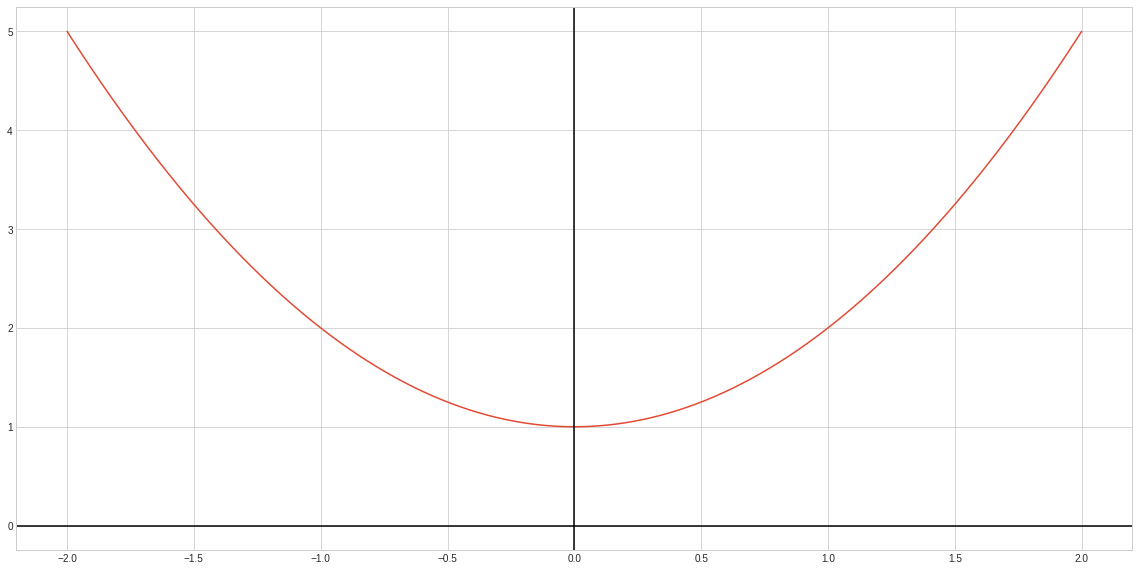

In [55]:
# plot p(x)
fig, ax = plt.subplots()
ax.plot(x, p(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

In [56]:
# solve
x1, x2 = solve(p)
x1, x2

((-6.123233995736766e-17-1j), (6.123233995736766e-17+1j))

The resultant above real values are essentially zero so output would be (0 - j), (0 + j). Therefore -j and +j are the roots of the equation.

In [57]:
# reformat x1 and x2 to round to 1 decimal place
f"x1 = {x1:.1f}, x2 = {x2:.1f}"

'x1 = -0.0-1.0j, x2 = 0.0+1.0j'

In [58]:
# create instance of quadratic
p = quadratic(a=2.0, b=5.0, c=10.0)

In [59]:
# create an array of 1000 evenly spaced values between -4.5 and 2.0
x = np.linspace(-4.5, 2.0, 1000)

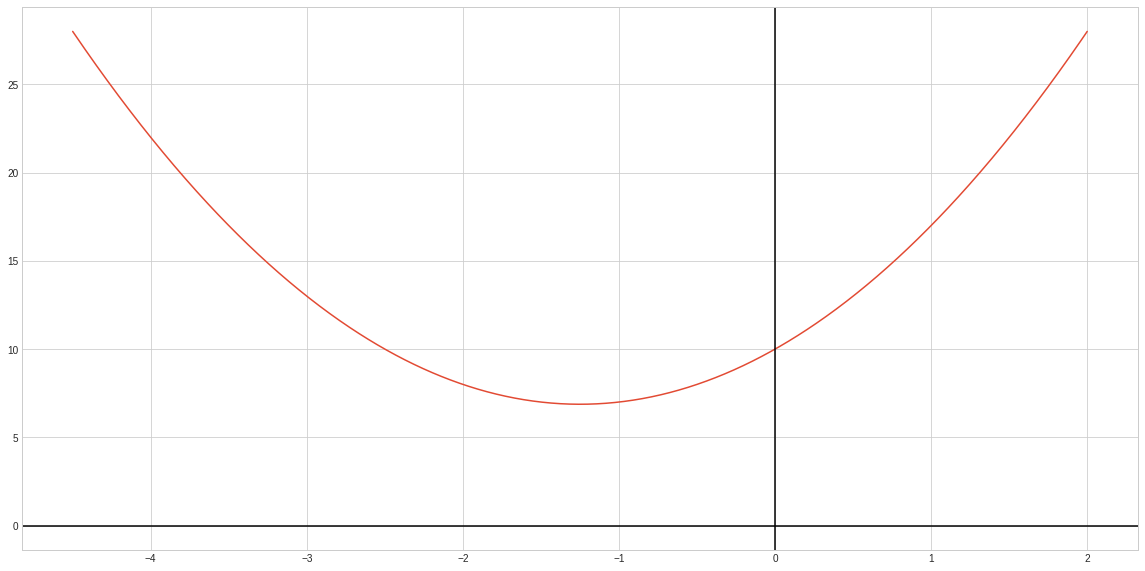

In [60]:
# plot p(x)
fig, ax = plt.subplots()
ax.plot(x, p(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

In [61]:
# solve
x1, x2 = solve(p)
x1, x2

((-1.2500000000000002-1.8540496217739157j),
 (-1.2499999999999998+1.8540496217739157j))

In [62]:
# reformat x1 and x2 to round to 1 decimal place
f"x1 = {x1:.1f}, x2 = {x2:.1f}"

'x1 = -1.3-1.9j, x2 = -1.2+1.9j'

## End Complex Numbers

<br />

## Balanced Functions or Constant Functions
***

In [63]:
# random selections
import random

# permutations and combinations
import itertools

<br />

## One bit inputs
***

$x$ is a bit.

It's possible values are 0 and 1.

In [64]:
# constant function - returns 1
def f_a(x):
    return 1

In [65]:
# pass 0
f_a(0)

1

In [66]:
# pass 1
f_a(1)

1

In [67]:
# constant function - returns 0
def f_b(x):
    return 0

In [68]:
# pass 0
f_b(0)

0

In [69]:
# pass 1
f_b(1)

0

In [70]:
# balaced function - returns passed value (half of inputs give 0 and half give 1)
def f_c(x):
    return x

In [71]:
# pass 0
f_c(0)

0

In [72]:
# pass 1
f_c(1)

1

In [73]:
# balaced function - returns remainder which flips the input and returns this value
def f_d(x):
    return ((x + 1) % 2)

In [74]:
# pass 0
f_d(0)

1

In [75]:
# pass 1
f_d(1)

0

__4 possible outcomes for the both inputs.__

|  x | f_a(x) | f_b(x) | f_c(x) | f_d(x) |
|----|--------|--------|--------|--------|
|  **0** |    1   |    0   |    0   |    1   |
|  **1** |    1   |    0   |    1   |    0   |


## Pick one of the functions at random

In [76]:
# put the four functions in a list (the functions themselves not a call to the function)
funcs = [f_a, f_b, f_c, f_d]

In [77]:
# select a function from the list at random (run multiple times to see random selections)
random.choice(funcs)

<function __main__.f_c(x)>

In [78]:
# assign to f, but not look at value of f, which function has been randomly assigned to f
f = random.choice(funcs)

<br />

## Test for balanced or constant
***

In [79]:
# testing for 0
f(0)

0

In [80]:
# testing for 1
f(1)

1

In the above testing, use 2 inputs to determine whether the function was balanced or constant. In the initial test the correct answer was f_d(x) which is a balance function, but this can change on subsequent executions.

<br />

## Two bits
***

There are only 2 possibilities for constant functions here, the first f which is all 0's and last f which is all 1's. There are 6 functions that are balanced, return 0 or 1 half the time. The Deutsch's Algorithm is only interested int the constant and balanced functions.

|  x1   |  x2   | f | f | f | f | f | f | f | f | f | f | f | f | f | f | f | f |
|-------|-------|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
| **0** | **0** | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 |
| **0** | **1** | 0 | 0 | 0 | 0 | 1 | 1 | 1 | 1 | 0 | 0 | 0 | 0 | 1 | 1 | 1 | 1 |
| **1** | **0** | 0 | 0 | 1 | 1 | 0 | 0 | 1 | 1 | 0 | 0 | 1 | 1 | 0 | 0 | 1 | 1 |
| **1** | **1** | 0 | 1 | 0 | 1 | 0 | 1 | 0 | 1 | 0 | 1 | 0 | 1 | 0 | 1 | 0 | 1 |

In next video, will show a technique for writing a general set up for this so it is not necessary to specify the functions ahead of time. We can just write an algorithm that will initially pick a function at random from the constant or balanced functions, then look at a general algorithm that to try figure out whether the function is constant or balanced. The goal is to use as little investigation as possible meaning, calling the function as little as possible.

The reason for interest in this scenario is because David Deutsch realised, as to whether quantum computers can do things that classical computers can't and do more quickly. The hardware side of this is really the main problem, whether things can be physically done. But on the software side, Deutsch realised that where the best classical computer algorithm to check if the function was balanced or constant needs to make two calls to the function, whereas with the quantum computer only needs to make a single call to the function.

Presently this is about 99% true. Can design a quantum computer that solve this problem, based on a single call. Therefore a quantum computer is supposed to solve this problem more efficiently than a classical computer. Can be shown theoretically that this is true. There is no doubt about the mathematics about this. Can you keep a qubit alive long enough to show this. 

The more bits you add as inputs, the number of function calls a classical computer needs to make goes up exponentially, whereas a quantum computer still solves it with that algorithm with a single function call.

In [81]:
# number of input bits
n = 2

In [82]:
# the zeros constant function - takes the contents of list [0], replicates 2**n times
[0] * 2**n

[0, 0, 0, 0]

In [83]:
# the ones constant function
[1] * 2**n

[1, 1, 1, 1]

In [84]:
# generate the balanced functions
# adopted from https://stackoverflow.com/a/43817007
def balanced_functions(noinputbits):
    # length of the list is 2 to power of noinputbits
    size = 2**noinputbits
    # number of ones is half the length of that list
    count = size // 2
    # generate all positions for 1's
    for positions in itertools.combinations(range(size), count):
        # create a list of zeros
        p = [0] * size
        # set positions to 1's
        for i in positions:
            p[i] = 1
        # generate list
        yield p

list(balanced_functions(2))

[[1, 1, 0, 0],
 [1, 0, 1, 0],
 [1, 0, 0, 1],
 [0, 1, 1, 0],
 [0, 1, 0, 1],
 [0, 0, 1, 1]]

The above output list reflects the above table of the 6 constant or balanced functions in no particular order.

In [85]:
# generate all the constant and balanced functions
def generate_functions(n):
    return list(balanced_functions(n)) + [[0] * 2**n, [1] * 2**n]

In [86]:
# generate all functions
generate_functions(n)

[[1, 1, 0, 0],
 [1, 0, 1, 0],
 [1, 0, 0, 1],
 [0, 1, 1, 0],
 [0, 1, 0, 1],
 [0, 0, 1, 1],
 [0, 0, 0, 0],
 [1, 1, 1, 1]]

The above output list contains all the constant and balanced functions along with the all zero's and all one's functions.

In [87]:
def randomf(n):
    # get all balanced and constant functions as lists
    funcs = generate_functions(n)
    # return a random function as a list
    return random.choice(funcs)

In [88]:
# call randomf for two input bits
f = randomf(2)

In [89]:
# just a list for now
f

[0, 0, 1, 1]

In [90]:
# make it a function
def randomf(n):
    # get all balanced and constant functions as lists
    funcs = generate_functions(n)   
    # pick one at random, get a random function
    retvals = random.choice(funcs)    
    # create a function from the list, *x means variable number of arguments
    def f(*x):
        # reverse the bits
        x = x[::-1]
        # running total for position in list for output bit
        retpos = 0
        # loop through the elements in x (reversed)
        for i in range(len(x)):
            # multiply i pos of x by 2^i
            retpos = retpos + (x[i] * 2**i)
        # list position
        return retvals[retpos]
    # function returns a function
    return f

In [91]:
# get a random function that takes two bits as input
randomf(2)

<function __main__.randomf.<locals>.f(*x)>

In [92]:
# get a random function that takes two bits as input
f = randomf(2)

In [93]:
# sample calls
f(1, 1)

1

With above initial sample the output of 1, determined that the only function it could not have been was the constant zero function.

In [94]:
# sample calls
f(0, 1)

0

With above initial sample the output of 0, determined that this function was one of the balanced functions not a constant function.

### Classical Algorithm
***

In [95]:
# number of input bits
n = 2

In [96]:
# generate a random constant or balanced function with n input bits
f = randomf(n)

In [97]:
# adapted from: https://stackoverflow.com/a/35313967
list(itertools.product(*[(0, 1)] * n))

[(0, 0), (0, 1), (1, 0), (1, 1)]

In [98]:
def balanced_or_constant(f, n):
    # presume f is constant
    constant = True
    # last returned value
    last = None
    # keep track of number of iterations
    i = 0
    # loop through all possible inputs
    for inputs in itertools.product(*[(0, 1)] * n):
        # try this input on f, inputs is a list of length n, unpacks list into parameters
        # of the function, use the elements of the list as arguments to function f
        current = f(*inputs)
        # print a debug message
        print(f"Trying: {inputs}  Return: {current}  Last: {last}")
        # compare last to current
        if last is not None and current != last:
            # tell the user f is balanced
            constant = False
            break
        last = current
        # increment the iteration count
        i = i + 1
        # have we performed 2**(n-1) + 1 iterations
        if i > 2**(n-1):
            break
    if constant:
        print("Constant")
    else:
        print("Balanced")

In [99]:
# pass values
balanced_or_constant(f, n)

Trying: (0, 0)  Return: 1  Last: None
Trying: (0, 1)  Return: 1  Last: 1
Trying: (1, 0)  Return: 0  Last: 1
Balanced


## More than two bits

As the number of input bits increases, the chances of getting a constant function becomes less and less. Because there are always only two constant functions but there are 2^2^(n-1)-2 balanced functions.
***

In [100]:
# four input bits
n = 4

In [101]:
# generate random function
f = randomf(n)

In [102]:
# test if balanced
balanced_or_constant(f, n)

Trying: (0, 0, 0, 0)  Return: 1  Last: None
Trying: (0, 0, 0, 1)  Return: 0  Last: 1
Balanced


## End Balanced Functions or Constant Functions

<br />

## Bell State
https://en.wikipedia.org/wiki/Bell_state
***

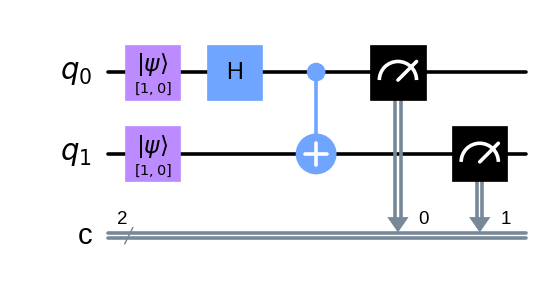

In [105]:
# create quantum circuit - with 2 qubits and 2 classical bits
circuit = qiskit.QuantumCircuit(2, 2)

# initialise first qubit to |0>
circuit.initialize([1, 0], 0)

# initialise second qubit to |0>
circuit.initialize([1, 0], 1)

# apply a Hadamard gate to first qubit
circuit.h(0)

# CNOT from 0 to 1
circuit.cnot(0, 1)

# measure qubits
circuit.measure((0, 1), (0, 1))

# draw circuit
circuit.draw(output='mpl', scale=1.8)

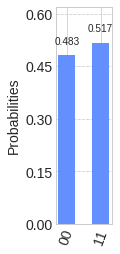

In [106]:
# create a simulation instance
simulator = aer.QasmSimulator()

# compile the circuit in the simluator
compcircuit = qiskit.transpile(circuit, simulator)

# simulate the circuit 1000 times
job = simulator.run(compcircuit, shots=1000)

# get the results
results = job.result()

# show the result counts
counts = results.get_counts()

# display histogram
qiskit.visualization.plot_histogram(counts, figsize=(1, 4))

In the above circuit, the interesting thing is that the probability of measuring both qubits as zero is 0.5, or measuring both qubits as one is also 0.5. Because of the way the circuit works out, there is no possibility of measuring the first qubit as zero and the second as one, or the first qubit as a one and the second as a zero. This is interesting because when we measure qubits, the theory states that they only decide whether they are a zero or a one at the point of measurement. Before this they are not in either state, they are in a superposition of states and this is why quantum computing works. In the physical world we don't think of an object such as a keyboard as being in a superposition of being all over the place and underneath your hands. But this happens in the quantum world, where things don't have definite locations or momentums until we have a look at them and it is they they seem to decide.

In the above display, you can have 2 qubits that are perfectly correlated with each other in the sense that when you measure one of them you immediately know what the other one is. If you only measure the first one and it is a zero then you immediately know the other one is a zero as well, and if it were a one then the you will know the other qubit will be a one too. This is because they are entangled particles and the value of one qubit determines the other. 

## End Bell State

***

## End of Notebook